# Notes

Here I will present a couple of notes and important concepts that I deem necessary or important. This is, after all, an attempt to teach myself Dynamical Systems so I would like to have these concepts in a handy place.

## Concepts

1. **Flow:** Where is the system moving towards? Given a system

   $$\dot{x} = f(x) $$
   
   the _flow_ will be moving towards the **right** if $\dot{x} > 0$ and towards the **left** if $\dot{x} < 0.$
   
2. **Fixed points:** Every point where there is **no flow**, i.e. $\dot{x} = 0.$ There can be two types of _fixed points:_
    
    a. **Stable:** _flow_ is **towards them**, and they are also called _attractors_ or _sinks._
    
    b. **Unstable:** _flow_ moves **away from them**, and they are also known as _repellers_ or _sources._

### Exercise 2.1.

In the next three exercises, interpret $$\dot{x} = \sin{x}$$ as a _flow_ on the line.

### 2.1.1. Find all the fixed points of the flow.

To answer this question one must find all values that satisfy
$$\dot{x} = \sin{x} = 0,$$
**analytically** it's quite simple, one must solve
$$\sin{x} = 0$$
which has solutions
$$x = n \pi ,\ n \in \mathbb{Z}.$$

In [2]:
# Numerically, one can find the roots and plot them
# First, import the necessary libraries
using Roots
using Plots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [3]:
# Define the function
f(x) = sin(x)
# Find all the zeros of this function within the interval
# x ∈ [-15, 15]
solutions = fzeros(f, -15, 15);

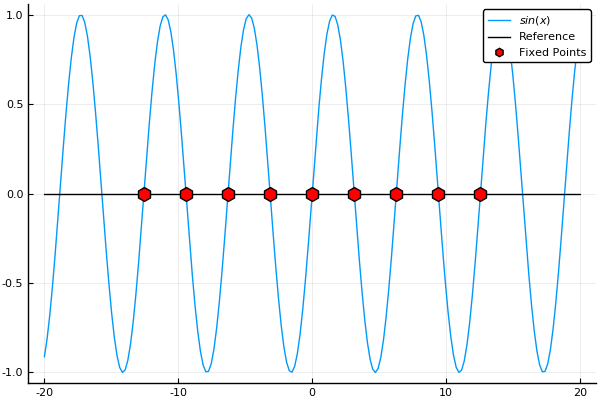

In [20]:
# Now we plot these points
x_vals = range(-20, stop=20, length=200)
plot(x_vals, f.(x_vals), lab = L"sin(x)", leg = :topright)
# This is a black line for reference, just to know where zero is
plot!(x_vals, zeros(length(x_vals)), color = :black, lab = "Reference")
# And these are the fixed points.
scatter!(solutions, zeros(length(solutions)), marker = (:hexagon, 10, :red), lab = "Fixed Points")